In [11]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift
from strategies import generate_reward_func, OptimalStrategy, get_y1_and_zeta
plt.style.use(r"C:\Users\razz_\AppData\Local\Programs\Python\Python310\Lib\site-packages\matplotlib\mpl-data\stylelib\theme_bw.mplstyle")

In [2]:
vals = np.linspace(0, 2, 200)

powers = [1, 2, 5]
a_values = [0.7, 0.9, 0.99]

payoffFuncs = [generate_reward_func(p, 0.9) for p in powers]

payoffs = [[g(v) for v in vals] for g in payoffFuncs]

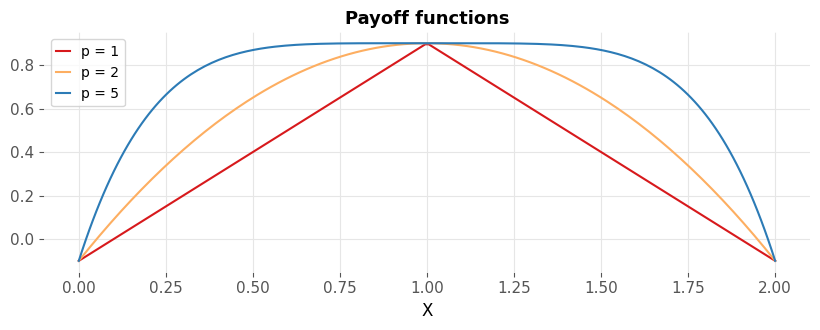

In [4]:
colors = ['#d7191c', '#fdae61', '#2c7bb6']

fig, ax = plt.subplots(1,1,figsize=(8.3, 3.4))
#fig.set_size_inches(11.69, 8.27)

for i, payoff in enumerate(payoffs):
    ax.plot(vals, payoff, label=f"p = {powers[i]}", color=colors[i])
ax.legend(loc="upper left", handlelength=1, handleheight=0.5)
ax.set_title("Payoff functions", fontsize=13, fontweight="bold")
#ax[0].set_xlabel("X", fontsize=12)
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax.set_xlabel("X")

plt.tight_layout()


plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\DriftAndReward\PayoffFunction.pdf')
plt.show()

# Looking at objective functions (Payoff per time)

In [19]:
powers = [1, 5]
Cs = [0.1, 0.5, 4]

objFuncs = []

sigmaFunc = sigma

for C in Cs:
    driftFunc = generate_linear_drift(C, 0)
    difPros = DiffusionProcess(driftFunc, sigmaFunc)
    for p in powers:
        rewardFunc = generate_reward_func(p, 0.9)
        optStrat = OptimalStrategy(difPros, rewardFunc)
        y1, zeta = get_y1_and_zeta(g=rewardFunc)
        print(f"y1 = {y1} and zeta = {zeta}")

        y = np.linspace(0.01, 1, 100)
        gs = rewardFunc(y)
        xis = difPros.xi(y)
        vals = gs/xis
        objFuncs.append(vals)

y1 = 0.10000000530791578 and zeta = 1.0000000051309512
y1 = 0.020851639380767693 and zeta = 0.9995360148300717
y1 = 0.10000000530791578 and zeta = 1.0000000051309512
y1 = 0.020851639380767693 and zeta = 0.9995360148300717
y1 = 0.10000000530791578 and zeta = 1.0000000051309512
y1 = 0.020851639380767693 and zeta = 0.9995360148300717


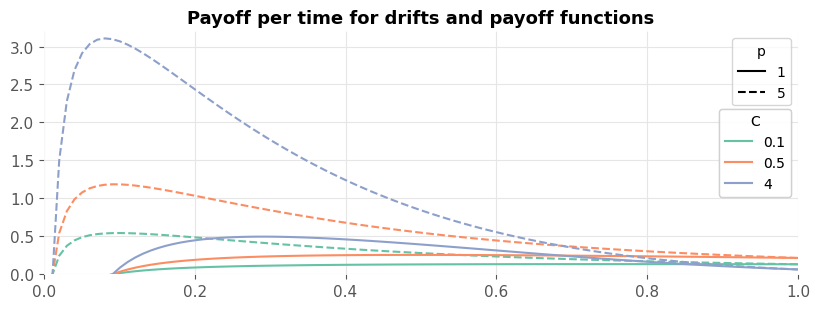

In [28]:
colors = {
    "0.1": "#66c2a5",
    "0.5": "#fc8d62",
    "4": "#8da0cb"
}

fig, ax = plt.subplots(1,1,figsize=(8.3, 3.2))
y = np.linspace(0, 1, 100)
for i, X in enumerate(objFuncs):
    power = powers[i % 2]
    C = Cs[i // 2]
    linestyle = '--' if power == 5 else '-'
    color = colors[str(C)]
    ax.plot(y, X, label=f"Payoff power = {power}, {driftFunc}", linestyle=linestyle, color=color)
    
ax.set_title("Payoff per time for drifts and payoff functions", fontsize=13, fontweight="bold")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax.ticklabel_format(style="plain")

# Create custom legend for line styles
line_style_solid = mlines.Line2D([], [], linestyle='-', color='black', label='1')
line_style_dashed = mlines.Line2D([], [], linestyle='--', color='black', label='5')
legend_style = ax.legend(handles=[line_style_solid, line_style_dashed], loc='upper right', title='p')
ax.add_artist(legend_style)

# Create custom legend for colors
color_legend_elements = [mlines.Line2D([], [], color=colors[str(C)], label=f"{C}") for C in Cs]
legend_color = ax.legend(handles=color_legend_elements, loc='right', title='C')
ax.add_artist(legend_color)
# ax.axhline(y=0, xmin=-1.5, xmax=1.5, color="black")
# ax.vlines(x=0, ymin=-5, ymax=5, color="black")
ax.set_ylim([0, 3.2])
ax.set_xlim([0, 1])
#ax.set_xlabel("X")
plt.tight_layout()
plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\DriftAndReward\FinalPlots\PayoffPerTime.pdf')
plt.show()